# Phase 4: Geometric Brownian Motion (GBM)

Goal:
- Build Geometric Brownian Motion from Brownian paths
- Understand drift vs volatility
- Verify theoretical moments of GBM
- Prepare the pricing framework used in option pricing

This is the canonical equity price model in continuous-time finance.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

## Geometric Brownian Motion

Geometric Brownian Motion is defined by the SDE:

$
dS_t = \mu S_t \, dt + \sigma S_t \, dW_t
$

where:
- $\mu =$ is the drift
- $\sigma$ is the volatility
- $W_t $ is Brownian motion

The exact solution is:

$
S_t = S_0 \exp\left(
\left(\mu - \tfrac{1}{2}\sigma^2\right)t
+ \sigma W_t
\right)
$

Instead of Euler approcximation we simulate this exactly.

In [3]:
S0 = 100.0     # initial price
mu = 0.05      # drift
sigma = 0.2    # volatility
T = 1.0        # time horizon (years)

n_steps = 252
n_paths = 5_000
dt = T / n_steps

## Step 1: Simulate Brownian Motion

We first simulate Brownian motion paths $W_t$,
then plug them into the closed-form GBM solution.

In [4]:
dW = np.sqrt(dt) * np.random.randn(n_paths, n_steps)
W = np.cumsum(dW, axis=1)
W = np.hstack([np.zeros((n_paths, 1)), W])

## Step 2: Construct GBM Paths

Using the exact solution:

$
S_t = S_0 \exp\!\left(
\left(\mu - \tfrac{1}{2}\sigma^2\right)t
+ \sigma W_t
\right)
$

In [5]:
t_grid = np.linspace(0, T, n_steps + 1)

S = S0 * np.exp(
    (mu - 0.5 * sigma**2) * t_grid
    + sigma * W
)

S.shape

(5000, 253)

## Visualize GBM Paths

Unlike Brownian motion, GBM paths:
- remain positive
- grow exponentially
- show increasing dispersion over time

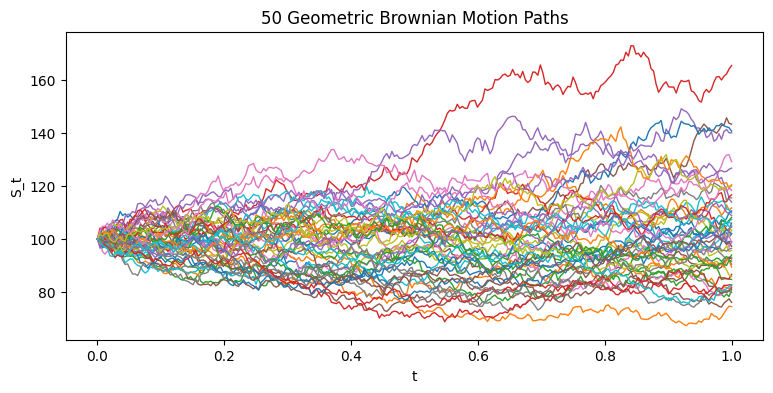

In [6]:
plt.figure(figsize=(9, 4))

for i in range(50):
    plt.plot(t_grid, S[i], linewidth=1)

plt.xlabel("t")
plt.ylabel("S_t")
plt.title("50 Geometric Brownian Motion Paths")
plt.show()

## Terminal Distribution

For GBM, the terminal value $S_T$ satisfies:

$
\log S_T \sim \mathcal{N}\left(
\log S_0 + \left(\mu - \tfrac{1}{2}\sigma^2\right)T,
\; \sigma^2 T
\right)
$

We verify this numerically.

In [7]:
S_T = S[:, -1]

log_ST = np.log(S_T)

np.mean(log_ST), np.std(log_ST, ddof=1)

(np.float64(4.630621041902842), np.float64(0.19914155557485125))

## Moment Check

The theoretical expectation of GBM is:

$
\mathbb{E}[S_T] = S_0 e^{\mu T}
$

We compare empirical and theoretical values.

In [8]:
empirical_mean = np.mean(S_T)
theoretical_mean = S0 * np.exp(mu * T)

empirical_mean, theoretical_mean

(np.float64(104.62421514325752), np.float64(105.12710963760242))

## Summary
- Constructed GBM paths using the exact analytical solution
- Simulated thousands of price paths and visualized a representative subset
- Checked consistency of terminal log-price moments with theoretical predictions
- Compared Monte Carlo estimates of \( \mathbb{E}[S_T] \) to the analytical benchmark

All results are based on model-generated data.
Next phase: Monte Carlo option pricing under GBM.